In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')


**Collecting the data**

In [ ]:
#load the dataset

data=pd.read_csv('bank_transactions.csv')
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207.0,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858.0,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712.0,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714.0,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156.0,1762.5


In [ ]:
#Checking for missing values
data.isnull().sum()

TransactionID                0
CustomerID                   1
CustomerDOB                710
CustGender                 220
CustLocation                41
CustAccountBalance         589
TransactionDate              1
TransactionTime              1
TransactionAmount (INR)      1
dtype: int64

In [ ]:
data.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,2.138100e+05,214398.000000,214398.000000
mean,1.111415e+05,156932.699405,1608.712464
std,7.223173e+05,50523.188971,6356.064392
min,0.000000e+00,1.000000,0.000000
25%,4.548830e+03,125052.000000,160.000000
50%,1.614031e+04,163101.000000,454.000000
75%,5.514068e+04,195828.000000,1194.000000
max,1.150355e+08,235957.000000,720001.160000


**Cleaning the data**

In [ ]:
 #1. Fill or drop missing Customer ID
data['CustomerID'].fillna('Unknown', inplace=True)  # Fill missing IDs with 'Unknown'

In [ ]:
# 2. Fill or drop missing Customer DOB
# Filling missing DOBs with mode  DOB
mode_dob =data['CustomerDOB'].mode()[0]
data['CustomerDOB'].fillna(mode_dob, inplace=True)

In [ ]:
# 3. Fill or drop missing Customer Gender
# Filling missing genders with mode (most frequent gender)
mode_gender = data['CustGender'].mode()[0]
data['CustGender'].fillna(mode_gender, inplace=True)

In [ ]:
# 4. Fill or drop missing Customer Location
# Filling missing locations with mode (most frequent location)
mode_location = data['CustLocation'].mode()[0]
data['CustLocation'].fillna(mode_location, inplace=True)


In [ ]:
# 5. Fill or drop missing Account Balance,  Amount
# Filling missing numerical values with mean
data['CustAccountBalance'].fillna(data['CustAccountBalance'].mean(), inplace=True)
data['TransactionAmount (INR)'].fillna(data['TransactionAmount (INR)'].mean(), inplace=True)

In [ ]:
# Filling missing date/time values with mode
mode_date = data['TransactionDate'].mode()[0]
mode_time = data['TransactionTime'].mode()[0]
data['TransactionDate'].fillna(mode_date, inplace=True)
data['TransactionTime'].fillna(mode_time, inplace=True)
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207.0,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858.0,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712.0,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714.0,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156.0,1762.5


In [ ]:
data.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

**Perform exploratory data analysis** **to have a better understanding of the data**


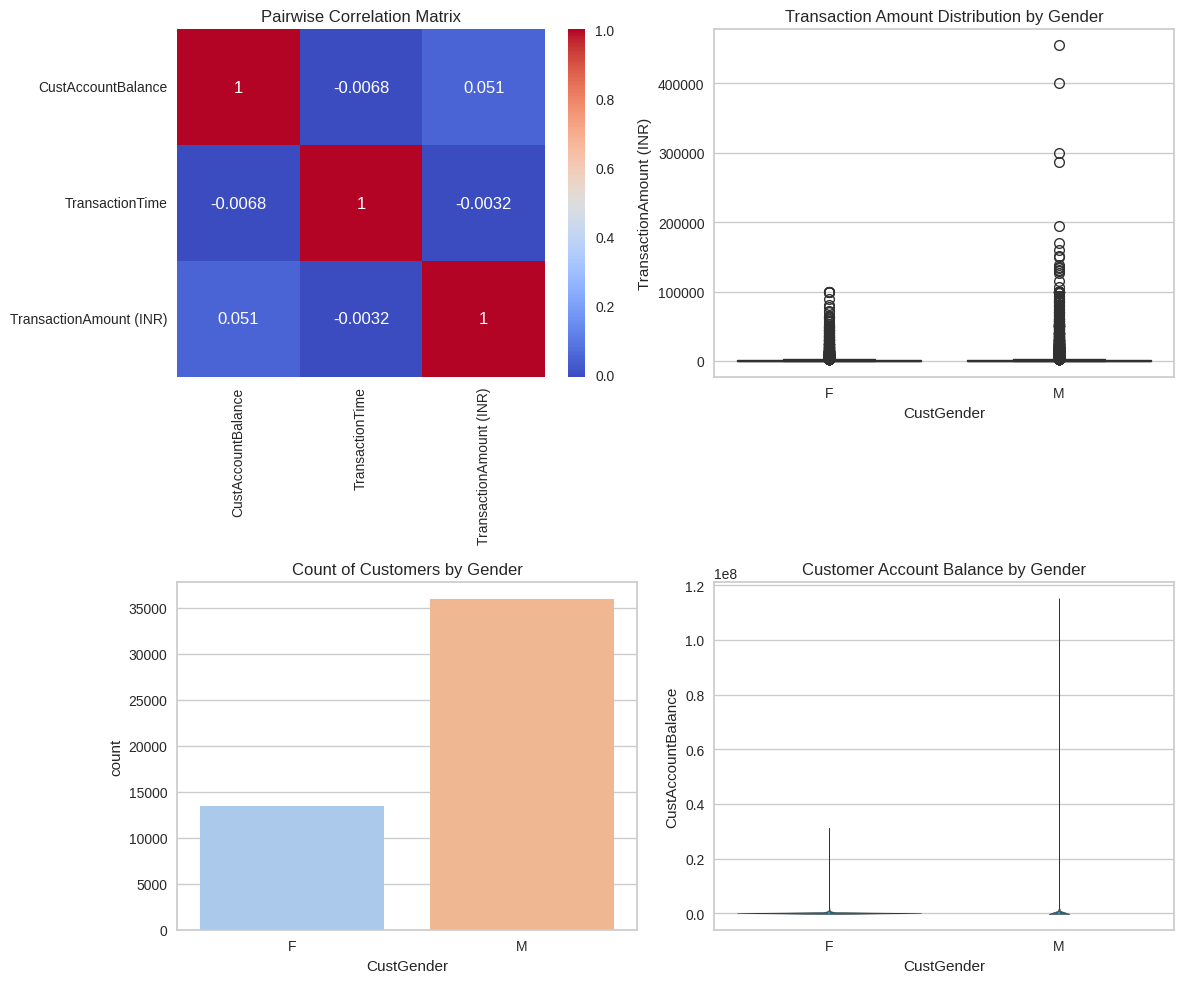

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Pairwise correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Pairwise Correlation Matrix')

# Boxplot for transaction_amount by gender
color=['red','pink']
sns.boxplot(x='CustGender', y='TransactionAmount (INR)', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Transaction Amount Distribution by Gender')

# Count plot for gender
sns.countplot(x='CustGender', data=data, ax=axes[1, 0],palette='pastel')
axes[1, 0].set_title('Count of Customers by Gender')

# Violin plot for customer account balance by gender
sns.violinplot(x='CustGender', y='CustAccountBalance', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Customer Account Balance by Gender')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
bank_data= data.copy()

In [ ]:
from datetime import datetime,date

bank_data['TransactionDate'] = pd.to_datetime(bank_data['TransactionDate'],format='%d/%m/%y')
bank_data['TransactionDate'] = bank_data['TransactionDate'].apply(lambda x: x - pd.DateOffset(years=100) if x > datetime.now() else x)

In [ ]:
bank_data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2016-08-02,143207.0,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2016-08-02,141858.0,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2016-08-02,142712.0,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2016-08-02,142714.0,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2016-08-02,181156.0,1762.5


In [ ]:
bank_data['TransactionYear'] = bank_data['TransactionDate'].dt.year
bank_data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2016-08-02,143207.0,25.0,2016
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2016-08-02,141858.0,27999.0,2016
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2016-08-02,142712.0,459.0,2016
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2016-08-02,142714.0,2060.0,2016
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2016-08-02,181156.0,1762.5,2016


In [ ]:
from datetime import datetime,date
bank_data['CustomerDOB'] = pd.to_datetime(data['CustomerDOB'],format='%d/%m/%y',errors='coerce')
bank_data['CustomerDOB'] = bank_data['CustomerDOB'].apply(lambda x: x - pd.DateOffset(years=100) if x > datetime.now() else x)
bank_data['CustomerYear'] = bank_data['CustomerDOB'].dt.year
bank_data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerYear
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207.0,25.0,2016,1994.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858.0,27999.0,2016,1957.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712.0,459.0,2016,1996.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714.0,2060.0,2016,1973.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156.0,1762.5,2016,1988.0


**Deriving age from Customer DOB**

In [ ]:
bank_data['CustomerAge'] = bank_data['TransactionYear'] - bank_data['CustomerYear']
bank_data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerYear,CustomerAge
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207.0,25.0,2016,1994.0,22.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858.0,27999.0,2016,1957.0,59.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712.0,459.0,2016,1996.0,20.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714.0,2060.0,2016,1973.0,43.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156.0,1762.5,2016,1988.0,28.0


In [ ]:
bank_data.drop('CustomerDOB',axis=1,inplace=True)

In [ ]:
bank_data.drop('CustomerYear',axis=1,inplace=True)

In [ ]:
#cleaning the missing age values
bank_data.isnull().sum()

TransactionID                  0
CustomerID                     0
CustGender                     0
CustLocation                   0
CustAccountBalance             0
TransactionDate                0
TransactionTime                0
TransactionAmount (INR)        0
TransactionYear                0
CustomerAge                12727
dtype: int64

In [ ]:
bank_clean = bank_data[bank_data.CustomerAge < 100]

**Plotting count of age**

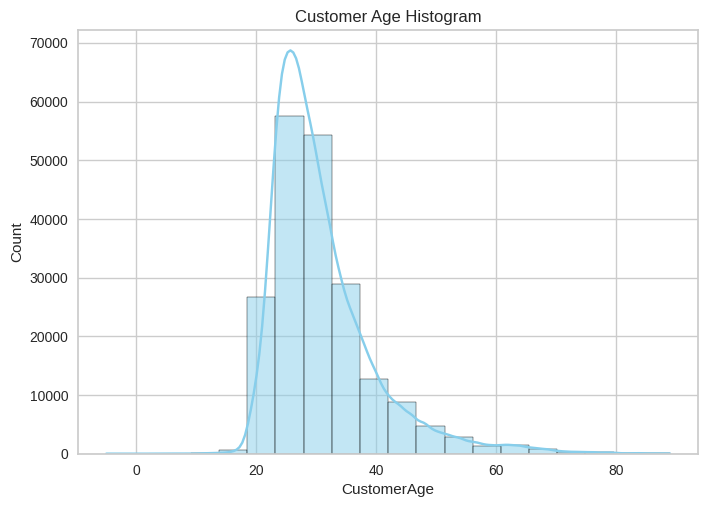

In [ ]:
sns.histplot(data=bank_clean,x='CustomerAge',bins=20,color='skyblue',kde=True)
plt.title('Customer Age Histogram')
plt.show()

**Customer Location analytics**

In [ ]:
#No of customers in a particular location
print(data['CustLocation'].value_counts())

MUMBAI                       21226
NEW DELHI                    17337
BANGALORE                    17306
GURGAON                      15083
DELHI                        14552
                             ...  
RAJGURUNAGAR PUNE                1
3 NAVI MUMBAI                    1
THIRUPUR                         1
SOSUR MAIN ROAD BANGALORE        1
LOWER DIBANG VALLEY              1
Name: CustLocation, Length: 5620, dtype: int64


**Top 10 locations with heighest number of customers**

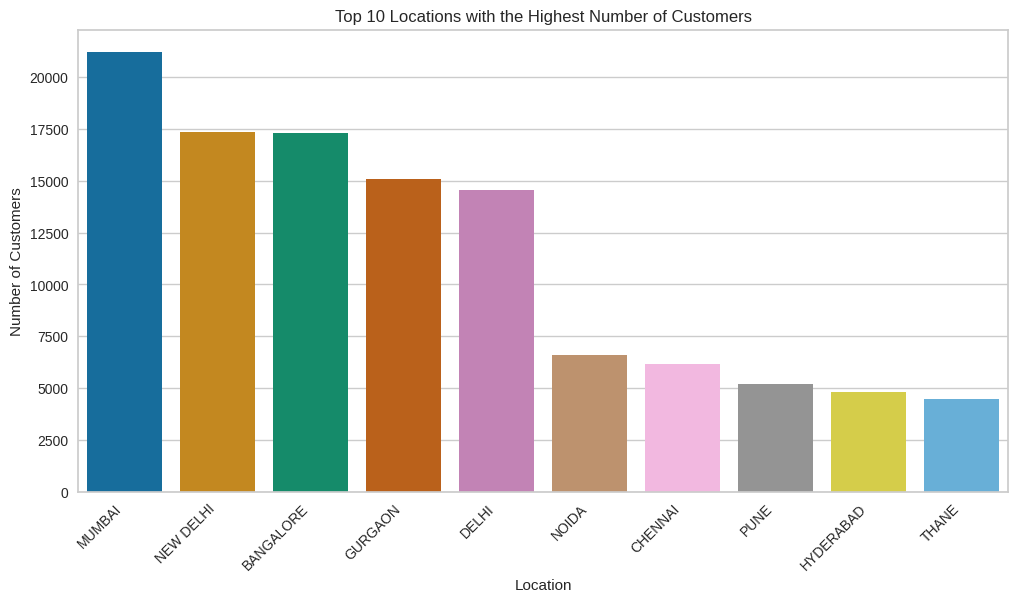

In [ ]:
location_counts = data['CustLocation'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='colorblind')
plt.title('Top 10 Locations with the Highest Number of Customers')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
bank_clean.isna().sum()

TransactionID              0
CustomerID                 0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
TransactionYear            0
CustomerAge                0
dtype: int64

**Checking if Account Balance > Transaction Amount**

In [ ]:
bank_clean[(bank_clean['CustAccountBalance'] - bank_clean['TransactionAmount (INR)'])<0]

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerAge
1,T2,C2142763,M,JHAJJAR,2270.69,2016-08-02,141858.0,27999.00,2016,59.0
26,T27,C5430368,M,DELHI,285.76,2016-08-03,160537.0,5500.00,2016,30.0
34,T35,C7017047,M,GURGAON,39.73,2016-08-03,182715.0,110.00,2016,39.0
36,T37,C4320949,F,CHENNAI,213.06,2016-08-03,182915.0,1081.00,2016,32.0
46,T47,C8934588,M,JAIPUR,5055.18,2016-08-03,223146.0,13846.00,2016,35.0
...,...,...,...,...,...,...,...,...,...,...
214311,T214312,C5834619,F,MUMBAI,115.34,2016-08-08,191015.0,563.45,2016,29.0
214313,T214314,C4729761,F,GURGAON,447.80,2016-08-08,190233.0,5275.00,2016,23.0
214343,T214344,C7623655,M,PUNE,0.79,2016-08-08,185449.0,40.00,2016,22.0
214376,T214377,C4285974,M,BANGALORE,4.27,2016-08-08,202004.0,276.00,2016,31.0


In [ ]:
bank_clean_2 = bank_clean[(bank_clean['CustAccountBalance'] - bank_clean['TransactionAmount (INR)'])>0]

In [ ]:
bank_clean_2.isna().sum()

TransactionID              0
CustomerID                 0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
TransactionYear            0
CustomerAge                0
dtype: int64

In [ ]:
bank_clean_2['CustGender'].fillna('M',inplace=True)
bank_clean_2['CustLocation'].fillna('MUMBAI',inplace=True)

In [ ]:
bank_clean_2.isna().sum()

TransactionID              0
CustomerID                 0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
TransactionYear            0
CustomerAge                0
dtype: int64

**Transactions by Time of Day**

In [ ]:
bank_clean_2['TransactionTime'] = bank_clean_2['TransactionTime'].apply(lambda x : datetime.utcfromtimestamp(int(x)).strftime('%H:%M:%S'))

In [ ]:
bank_clean_2.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerAge
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-08-02,15:46:47,25.0,2016,22.0
2,T3,C4417068,F,MUMBAI,17874.44,2016-08-02,15:38:32,459.0,2016,20.0
3,T4,C5342380,F,MUMBAI,866503.21,2016-08-02,15:38:34,2060.0,2016,43.0
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-08-02,02:19:16,1762.5,2016,28.0
5,T6,C1536588,F,ITANAGAR,53609.20,2016-08-02,00:19:00,676.0,2016,44.0


In [ ]:
time_split = bank_clean_2['TransactionTime'].str.split(':',expand=True)
bank_clean_2['TransactionHour'] = time_split[0].astype(int)

In [ ]:
bank_clean_2.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerAge,TransactionHour
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-08-02,15:46:47,25.0,2016,22.0,15
2,T3,C4417068,F,MUMBAI,17874.44,2016-08-02,15:38:32,459.0,2016,20.0,15
3,T4,C5342380,F,MUMBAI,866503.21,2016-08-02,15:38:34,2060.0,2016,43.0,15
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-08-02,02:19:16,1762.5,2016,28.0,2
5,T6,C1536588,F,ITANAGAR,53609.20,2016-08-02,00:19:00,676.0,2016,44.0,0


In [ ]:
transactions_num_2 = bank_clean_2[['TransactionAmount (INR)','TransactionHour']]

hourly_transactions = transactions_num_2.groupby('TransactionHour').agg(['median','count'])
hourly_transactions

TransactionAmount (INR)       
                                 median  count
TransactionHour                               
0                               400.000   7674
1                               288.725   4060
2                               418.000   9483
3                               430.000   7064
4                               314.590   6016
5                               450.000  12150
6                               425.000   7522
7                               420.000   9782
8                               473.000  12442
9                               380.000   6601
10                              440.000  12966
11                              410.000   8097
12                              400.000   6676
13                              399.000  11076
14                              300.000   5012
15                              415.000   8287
16                              400.000   7338
17                              355.000   4922
18                              460.000   8022
19                              360.000   3229
20                              388.840   5566
21                              459.005   7058
22                              300.000   2462
23                              400.000   7584

**Median Transaction Amount by Time of Day**

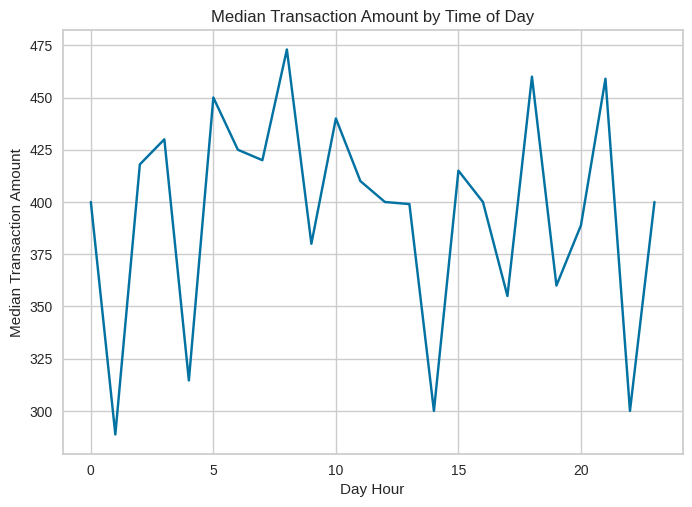

In [ ]:
hourly_transactions['TransactionAmount (INR)','median'].plot(kind='line')
plt.title('Median Transaction Amount by Time of Day')
plt.xlabel('Day Hour')
plt.ylabel('Median Transaction Amount')
plt.show()

**KMeans Clustering**

In [ ]:
bank_clean.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerAge
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-08-02,143207.0,25.0,2016,22.0
1,T2,C2142763,M,JHAJJAR,2270.69,2016-08-02,141858.0,27999.0,2016,59.0
2,T3,C4417068,F,MUMBAI,17874.44,2016-08-02,142712.0,459.0,2016,20.0
3,T4,C5342380,F,MUMBAI,866503.21,2016-08-02,142714.0,2060.0,2016,43.0
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-08-02,181156.0,1762.5,2016,28.0


In [ ]:
#converting categorical variables
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

bank_clean['CustGender']= le.fit_transform(bank_clean['CustGender'])
bank_clean['CustLocation']= le.fit_transform(bank_clean['CustLocation'])
bank_clean.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerAge
0,T1,C5841053,0,1918,17819.05,2016-08-02,143207.0,25.0,2016,22.0
1,T2,C2142763,1,1949,2270.69,2016-08-02,141858.0,27999.0,2016,59.0
2,T3,C4417068,0,2834,17874.44,2016-08-02,142712.0,459.0,2016,20.0
3,T4,C5342380,0,2834,866503.21,2016-08-02,142714.0,2060.0,2016,43.0
4,T5,C9031234,0,3046,6714.43,2016-08-02,181156.0,1762.5,2016,28.0


In [ ]:
bank_clean = bank_clean.drop(['TransactionID','CustomerID','TransactionYear','TransactionDate','TransactionTime'],axis=1)
bank_clean.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge
0,0,1918,17819.05,25.0,22.0
1,1,1949,2270.69,27999.0,59.0
2,0,2834,17874.44,459.0,20.0
3,0,2834,866503.21,2060.0,43.0
4,0,3046,6714.43,1762.5,28.0


In [ ]:
bank_clean[bank_clean['TransactionAmount (INR)'] == 0].count()

CustGender                 160
CustLocation               160
CustAccountBalance         160
TransactionAmount (INR)    160
CustomerAge                160
dtype: int64

In [ ]:
bank_clean = bank_clean.drop(bank_clean[bank_clean['TransactionAmount (INR)'] == 0].index,axis = 0)

In [ ]:
#scaling the data
from sklearn.preprocessing import StandardScaler

columns_names=['CustGender','CustLocation','CustAccountBalance','TransactionAmount (INR)','CustomerAge']
s = StandardScaler()
bank_clean = s.fit_transform(bank_clean)
bank_clean = pd.DataFrame(bank_clean,columns=columns_names)
bank_clean.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge
0,-1.602253,-0.227150,-0.119289,-0.244784,-1.026012
1,0.624121,-0.202820,-0.141797,4.452740,3.220483
2,-1.602253,0.491758,-0.119209,-0.171904,-1.255552
3,-1.602253,0.491758,1.109291,0.096943,1.384161
4,-1.602253,0.658143,-0.135364,0.046985,-0.337391


In [ ]:
import random
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

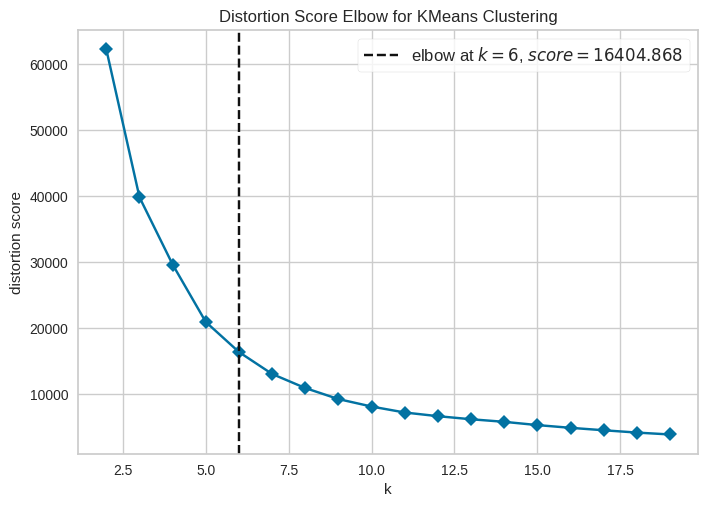

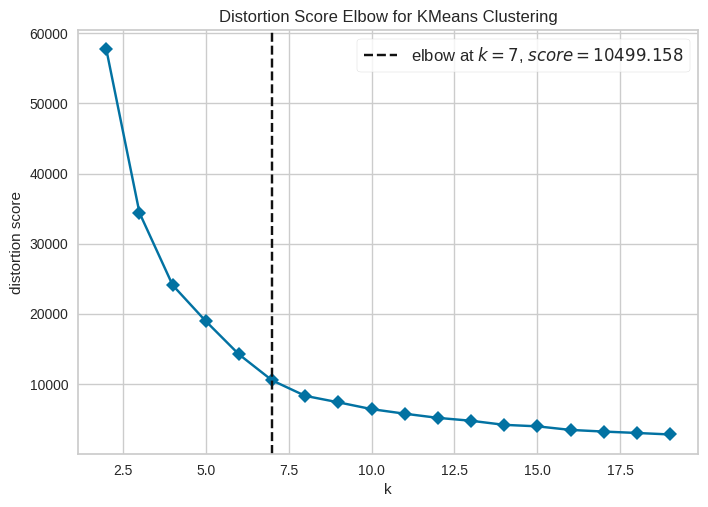

In [ ]:
# Extract features from the DataFrame
X = bank_clean[['CustomerAge', 'TransactionAmount (INR)']].values
Y = bank_clean[['CustLocation', 'TransactionAmount (INR)']].values

# Function to perform KMeans clustering and plot the elbow method
def perform_elbow_method(X, k_range, title):
    model = KMeans(init='k-means++', random_state=42)
    visualizer = KElbowVisualizer(model, k=k_range, timings=False)
    visualizer.fit(X)
    plt.title(title)
    visualizer.show()

perform_elbow_method(X, k_range=(2, 20), title='Elbow Method for Customer Age Clustering')
perform_elbow_method(Y, k_range=(2, 20), title='Elbow Method for Customer Location Clustering')


In [ ]:
def perform_kmeans_clustering(X, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    cluster_centers = kmeans.cluster_centers_
    return cluster_labels, cluster_centers

x_cluster_labels, x_cluster_centers = perform_kmeans_clustering(X, num_clusters=6)
y_cluster_labels, y_cluster_centers = perform_kmeans_clustering(Y, num_clusters=7)

In [ ]:
print("x_cluster_labels",x_cluster_labels)
print("x_cluster_centers",x_cluster_centers)
print("y_cluster_labels",y_cluster_labels)
print("y_cluster_centers",y_cluster_centers)

x_cluster_labels [1 2 1 ... 0 0 1]
x_cluster_centers [[ 6.04215925e-01 -2.01703968e-02]
 [-5.73073679e-01 -1.15952370e-01]
 [ 6.28430472e-01  4.68912967e+00]
 [ 8.72257414e-01  5.93607258e+01]
 [ 2.76069872e+00  5.85914595e-02]
 [ 1.01115839e+00  1.41869438e+01]]
y_cluster_labels [6 3 0 ... 1 1 0]
y_cluster_centers [[ 6.72073619e-01 -6.58989135e-02]
 [-1.20328146e+00 -8.42704683e-02]
 [ 3.23279854e-02  1.41869438e+01]
 [ 3.07586240e-02  4.57648650e+00]
 [-1.63152678e-02  5.93607258e+01]
 [ 1.74832841e+00 -8.93368987e-02]
 [-3.33814206e-01 -8.13556667e-02]]


In [ ]:
# Add cluster labels to the DataFrame
bank_clean['cluster_age'] = x_cluster_labels
bank_clean['cluster_location'] = y_cluster_labels

# Add centroids to the DataFrame
bank_clean['cen_xx'] = bank_clean.cluster_age.map({i: x_cluster_centers[i][0] for i in range(6)})
bank_clean['cen_xy'] = bank_clean.cluster_age.map({i: x_cluster_centers[i][1] for i in range(6)})
bank_clean['cen_yx'] = bank_clean.cluster_location.map({i: y_cluster_centers[i][0] for i in range(7)})
bank_clean['cen_yy'] = bank_clean.cluster_location.map({i: y_cluster_centers[i][1] for i in range(7)})

bank_clean.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,cluster_age,cluster_location,cen_xx,cen_xy,cen_yx,cen_yy
0,-1.597366,-0.237358,-0.106430,-0.235669,-1.022287,1,6,-0.573074,-0.115952,-0.333814,-0.081356
1,0.626031,-0.216235,-0.124470,4.391696,3.101133,2,3,0.628430,4.689130,0.030759,4.576487
2,-1.597366,0.506493,-0.106366,-0.163878,-1.245175,1,0,-0.573074,-0.115952,0.672074,-0.065899
3,-1.597366,0.506493,0.878272,0.100954,1.318033,0,0,0.604216,-0.020170,0.672074,-0.065899
4,-1.597366,0.669446,-0.119315,0.051742,-0.353624,1,0,-0.573074,-0.115952,0.672074,-0.065899


In [ ]:
# Define colors for each cluster
colors_X = ['red', 'yellow', 'grey', 'green', 'blue', 'orange']
colors_Y = ['red', 'yellow', 'grey', 'green', 'blue', 'orange', 'pink']

# Add cluster colors to the DataFrame
bank_clean['color_age_km'] = bank_clean.cluster_age.map({i: colors_X[i] for i in range(6)})
bank_clean['color_location_km'] = bank_clean.cluster_location.map({i: colors_Y[i] for i in range(7)})

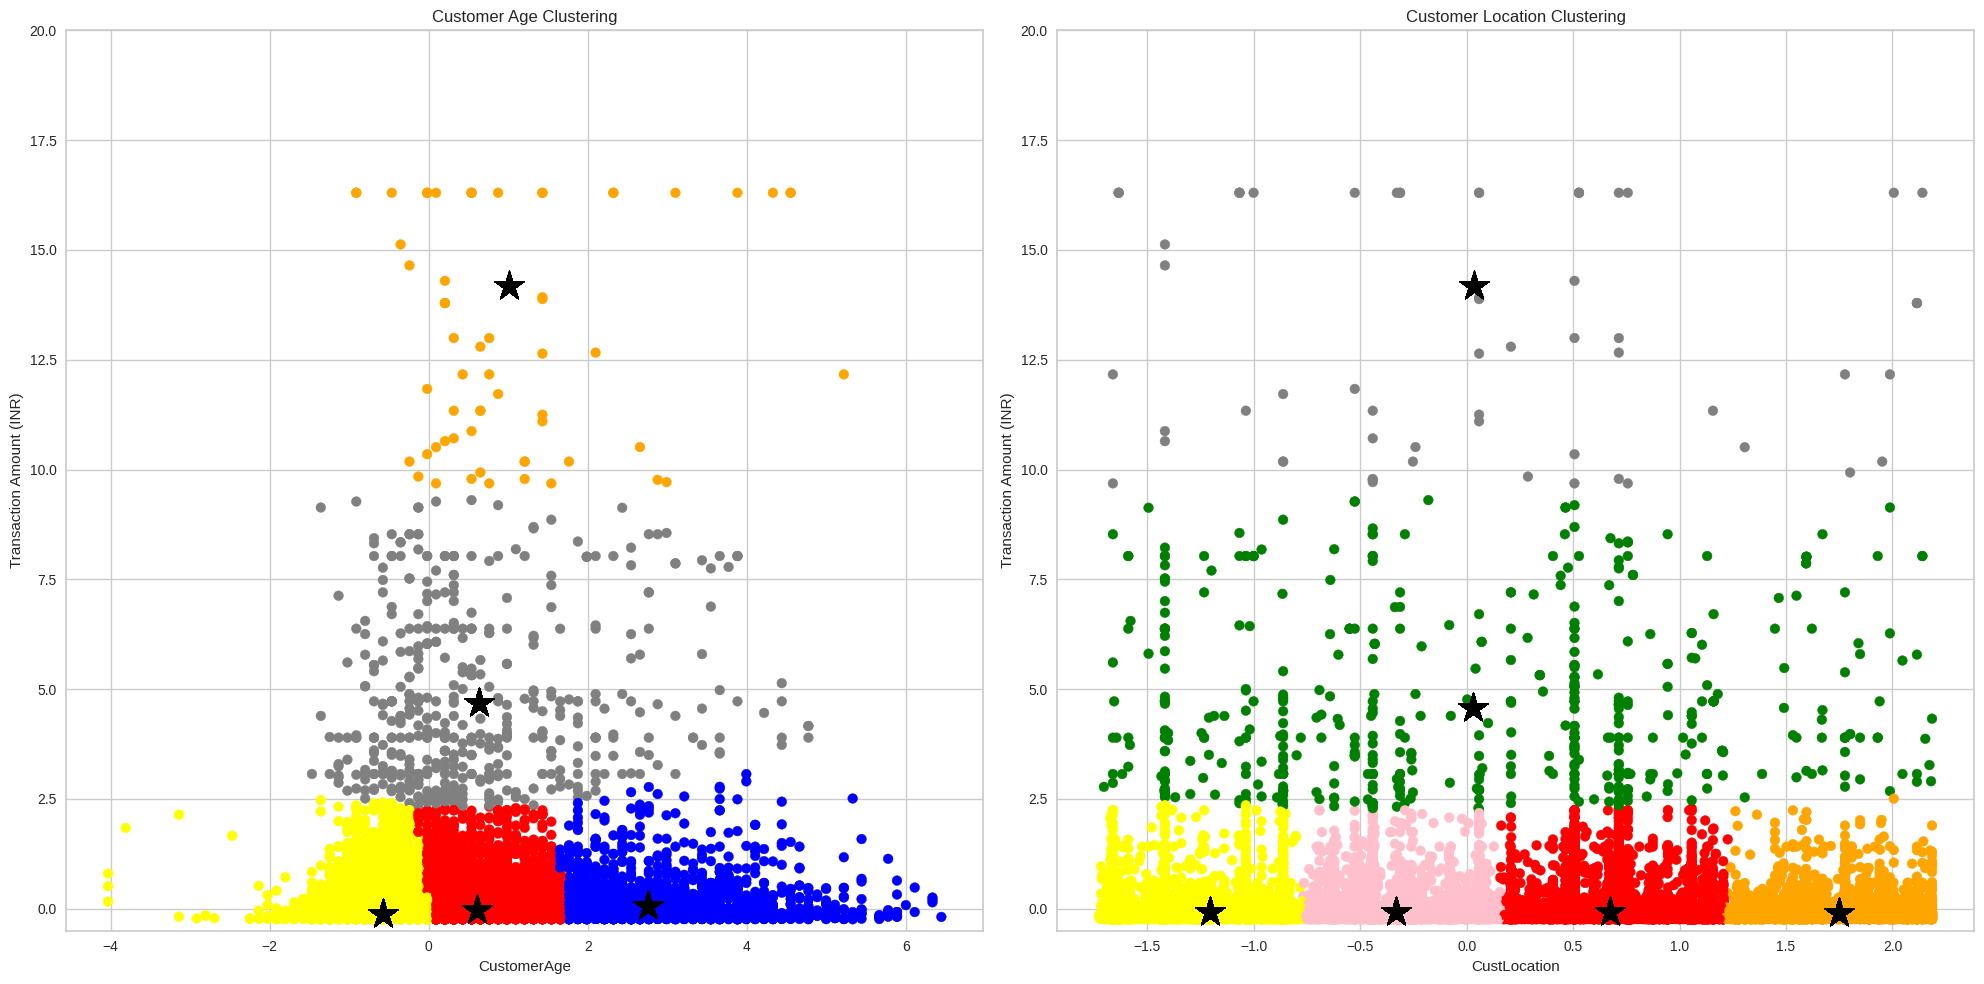

In [ ]:
# Plot the scatter plot with cluster colors and centroids for 'Customer age' and 'TransactionAmount (INR)'
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(bank_clean['CustomerAge'], bank_clean['TransactionAmount (INR)'], c=bank_clean.color_age_km)
plt.scatter(bank_clean['cen_xx'], bank_clean['cen_xy'], marker='*', s=500, c='black')
plt.ylim([-0.5, 20])
plt.xlabel('CustomerAge')
plt.ylabel('Transaction Amount (INR)')
plt.title('Customer Age Clustering')

# Plot the scatter plot with cluster colors and centroids for 'CustLocation' and 'TransactionAmount (INR)'
plt.subplot(1, 2, 2)
plt.scatter(bank_clean['CustLocation'], bank_clean['TransactionAmount (INR)'], c=bank_clean.color_location_km)
plt.scatter(bank_clean['cen_yx'], bank_clean['cen_yy'], marker='*', s=500, c='black')
plt.ylim([-0.5, 20])
plt.xlabel('CustLocation')
plt.ylabel('Transaction Amount (INR)')
plt.title('Customer Location Clustering')
plt.tight_layout()  # Adjusts the spacing between the plots
plt.show()

**Cluster analysis**

In [ ]:
bank_clean.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,cluster_age,cluster_location,cen_xx,cen_xy,cen_yx,cen_yy,color_age_km,color_location_km
0,-1.597366,-0.237358,-0.106430,-0.235669,-1.022287,1,6,-0.573074,-0.115952,-0.333814,-0.081356,yellow,pink
1,0.626031,-0.216235,-0.124470,4.391696,3.101133,2,3,0.628430,4.689130,0.030759,4.576487,grey,green
2,-1.597366,0.506493,-0.106366,-0.163878,-1.245175,1,0,-0.573074,-0.115952,0.672074,-0.065899,yellow,red
3,-1.597366,0.506493,0.878272,0.100954,1.318033,0,0,0.604216,-0.020170,0.672074,-0.065899,red,red
4,-1.597366,0.669446,-0.119315,0.051742,-0.353624,1,0,-0.573074,-0.115952,0.672074,-0.065899,yellow,red


In [ ]:
age_cluster_avg = bank_clean.groupby('cluster_age').mean().reset_index()
location_cluster_avg = bank_clean.groupby('cluster_location').mean().reset_index()

print("Cluster_Age")
print(age_cluster_avg[['CustLocation','CustAccountBalance','TransactionAmount (INR)','CustomerAge']])
print("\n")
print("Cluster_Location")
print(location_cluster_avg[['CustLocation','CustAccountBalance','TransactionAmount (INR)','CustomerAge']])

Cluster_Age
   CustLocation  CustAccountBalance  TransactionAmount (INR)  CustomerAge
0      0.023446            0.046577                -0.020178     0.604048
1     -0.014451           -0.061953                -0.115985    -0.573112
2      0.055631            0.366630                 4.689130     0.628430
3     -0.016315            0.574655                59.360726     0.872257
4      0.024026            0.332124                 0.058866     2.760315
5      0.032328            0.300688                14.186944     1.011158


Cluster_Location
   CustLocation  CustAccountBalance  TransactionAmount (INR)  CustomerAge
0      0.672042            0.008533                -0.065897     0.042824
1     -1.203281           -0.016358                -0.084270    -0.047683
2      0.032328            0.300688                14.186944     1.011158
3      0.030759            0.429263                 4.576487     0.687106
4     -0.016315            0.574655                59.360726     0.872257
5      

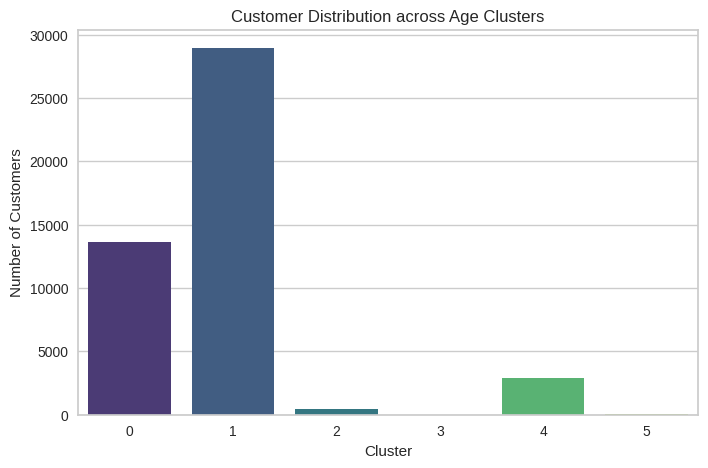

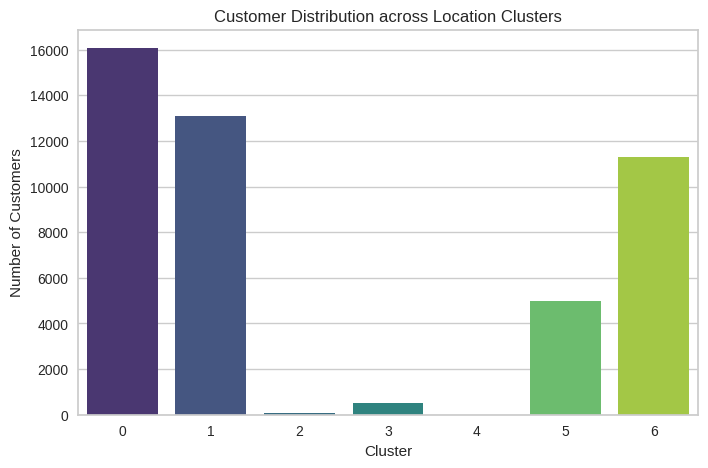

In [ ]:
# Count the number of customers in each 'cluster_age_km' and 'cluster_location_km'
age_cluster_counts = bank_clean['cluster_age'].value_counts().reset_index()
age_cluster_counts.columns = ['Cluster', 'Count']

location_cluster_counts = bank_clean['cluster_location'].value_counts().reset_index()
location_cluster_counts.columns = ['Cluster', 'Count']

# Function to plot cluster distribution
def plot_cluster_distribution(cluster_counts, title):
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Cluster', y='Count', data=cluster_counts, palette='viridis')
    plt.title(title)
    plt.xlabel('Cluster')
    plt.ylabel('Number of Customers')
    plt.show()


plot_cluster_distribution(age_cluster_counts, title='Customer Distribution across Age Clusters')
plot_cluster_distribution(location_cluster_counts, title='Customer Distribution across Location Clusters')

Cluster_Age

Cluster 0 : middle-aged customers with moderate transaction activity.
Cluster 1 : younger customers with low transaction activity and lower account balances.
Cluster 2 : older customers who make substantial transactions and maintain higher account balances.
Cluster 3 : diverse group of customers with moderate account balances and transaction amounts.
Cluster 4 : financially stable customers who make sizeable transactions.
Cluster 5 : younger customers who make large transactions.
Cluster_Location

Cluster 0 : diverse group of customers from specific locations.
Cluster 1 : mixed group with moderate account balances and transaction amounts.
Cluster 2 : younger customers from specific locations making significant transactions.
Cluster 3 : younger customers from specific locations making substantial transactions.
Cluster 4 : customers from various locations with lower account balances and transaction amounts.
Cluster 5 : customers from specific locations who maintain higher account balances and make moderate transactions.
Cluster 6 : older customers who make substantial transactions and maintain higher account balances.

The findings highlight the importance of understanding customer segments based on age and location.

Cluster_Age : Cluster 1, consisting of younger customers with lower activity, might be a potential target for engagement and marketing strategies to increase their transaction involvement. Cluster 3, representing a diverse group of customers, requires a tailored approach to meet their varying needs.
Cluser_Location : Additionally, the bank can focus on serving customers from clusters 5 and 4, which have distinct characteristics in terms of location and transaction behavior.

**Conclusion:**
To optimize marketing efforts, the bank should focus on customer segments with higher representation, such as clusters 1 and 3 (age-based clusters) and clusters 5, 4, 1, and 0 (location-based clusters). Targeting these clusters can lead to effective customer engagement and better ROI on marketing campaign